# Ridge Regression (Naive Implementation)

In [1]:
n <- 50
p <- 400

X <- matrix(rnorm(n*p), n, p)
b <- rep(0, 400)
b[301:305] <- c(5:1)*2

y <-  X%*%b + rnorm(n)
ynew <-  X%*%b + rnorm(n)


## lambda
lambda <- 10^seq(-3, 3, length.out=100)
betamat <- matrix(0, 100, p)

system.time( for (i in 1:100) {
    betamat[i,] <- solve( (t(X)%*%X + lambda[i]*diag(1,p) ))%*%t(X)%*%matrix(y, ncol=1)
})

   user  system elapsed 
  4.666   0.154   4.821 

In [2]:
betamat[1, 280:310]

[1] -0.084447993 -0.106803028 -0.437505039  0.080991366  0.057165451
 [6]  0.033904948 -0.363373309  0.194744435 -0.177177094  0.074574018
[11]  0.256026951 -0.004047982  0.240359162 -0.190340520  0.226711799
[16] -0.049115276  0.294052940  0.180326624 -0.219771067  0.088978359
[21]  0.115597248  1.178650249  1.094394550  0.300686921  0.280028994
[26]  0.438805772 -0.006184169  0.127084065  0.423278290  0.003052029
[31]  0.215779348

In [3]:
betamat[1, 301:305]

[1] 1.1786502 1.0943945 0.3006869 0.2800290 0.4388058

In [6]:
betamat[100, 301:305]

[1] 0.30005719 0.30248785 0.05281168 0.09115157 0.10258957

In [4]:
b[301:305]

[1] 10  8  6  4  2

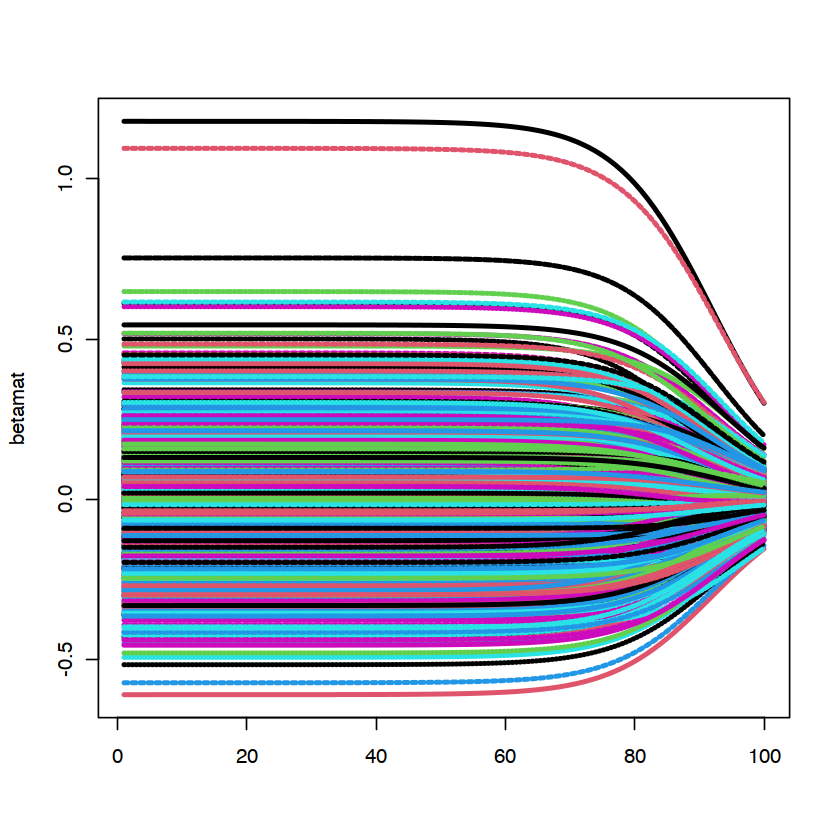

In [7]:
matplot(betamat, lwd=3, type="l")

## Prediction Loss

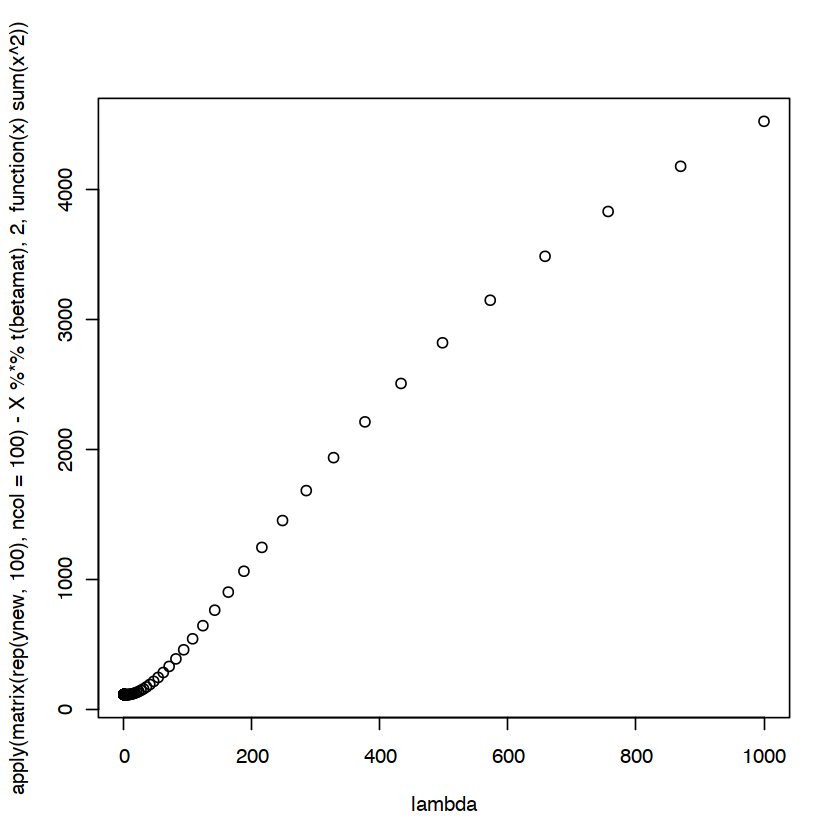

In [8]:
plot( lambda, apply(matrix(rep(ynew, 100), ncol=100) - X%*%t(betamat), 2, function(x) sum(x^2) ) ) 

In [9]:
apply(matrix(rep(ynew, 100), ncol=100) - X%*%t(betamat), 2, function(x) sum(x^2) ) 

[1]  113.5409  113.5408  113.5407  113.5406  113.5405  113.5404  113.5402
  [8]  113.5400  113.5398  113.5395  113.5392  113.5389  113.5385  113.5380
 [15]  113.5375  113.5369  113.5362  113.5354  113.5345  113.5334  113.5322
 [22]  113.5308  113.5293  113.5274  113.5253  113.5229  113.5202  113.5170
 [29]  113.5133  113.5092  113.5044  113.4989  113.4926  113.4853  113.4771
 [36]  113.4676  113.4568  113.4444  113.4303  113.4142  113.3959  113.3751
 [43]  113.3515  113.3247  113.2945  113.2605  113.2224  113.1799  113.1326
 [50]  113.0805  113.0234  112.9617  112.8957  112.8265  112.7557  112.6858
 [57]  112.6205  112.5652  112.5275  112.5182  112.5518  112.6484  112.8350
 [64]  113.1476  113.6342  114.3580  115.4022  116.8749  118.9159  121.7053
 [71]  125.4724  130.5080  137.1772  145.9341  157.3387  172.0736  190.9608
 [78]  214.9778  245.2694  283.1551  330.1282  387.8439  458.0944  542.7689
 [85]  643.7945  763.0620  902.3331 1063.1366 1246.6557 1453.6166 1684.1858
 [92] 1937.8878 2213.5529 2509.3042 2822.5881 3150.2521 3488.6634 3833.8619
 [99] 4181.7334 4528.1888

[1] 60

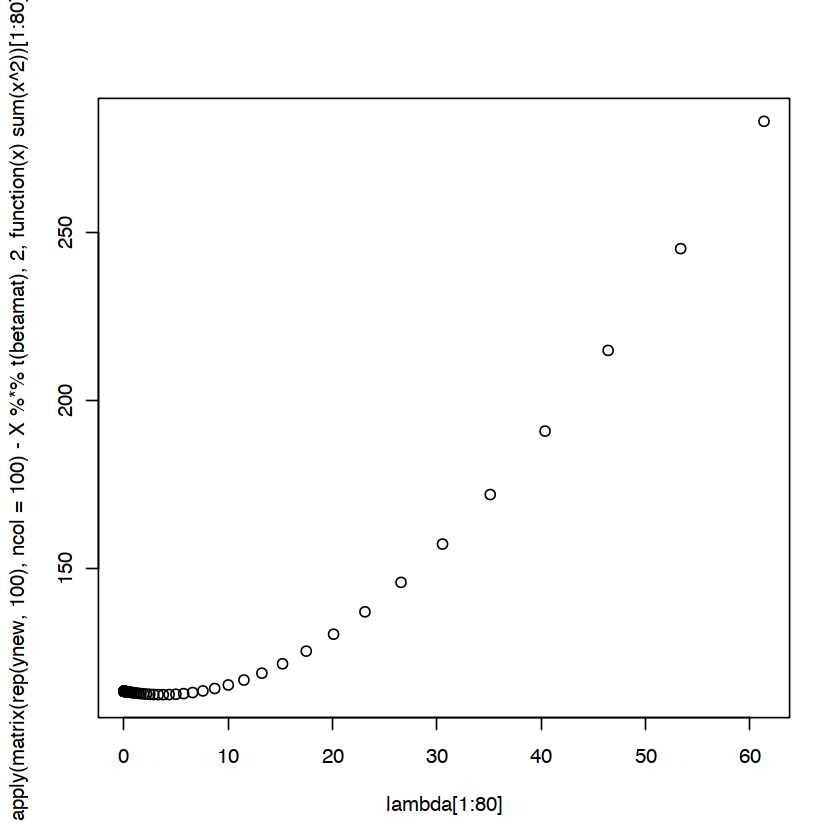

In [10]:
plot( lambda[1:80], apply(matrix(rep(ynew, 100), ncol=100) - X%*%t(betamat), 2, function(x) sum(x^2) )[1:80] ) 
which.min(apply(matrix(rep(ynew, 100), ncol=100) - X%*%t(betamat), 2, function(x) sum(x^2) ) 
)

## Inference/Estimation Loss

In [11]:
apply(matrix(rep(b, 100), ncol=100)  - t(betamat), 2, function(x) sum(x^2) )

[1] 196.0362 196.0362 196.0362 196.0362 196.0362 196.0362 196.0362 196.0362
  [9] 196.0362 196.0362 196.0362 196.0362 196.0362 196.0362 196.0362 196.0362
 [17] 196.0362 196.0362 196.0362 196.0362 196.0362 196.0362 196.0362 196.0362
 [25] 196.0361 196.0361 196.0361 196.0361 196.0361 196.0361 196.0361 196.0360
 [33] 196.0360 196.0360 196.0359 196.0359 196.0358 196.0358 196.0357 196.0357
 [41] 196.0356 196.0355 196.0354 196.0353 196.0351 196.0350 196.0348 196.0346
 [49] 196.0344 196.0342 196.0340 196.0337 196.0334 196.0331 196.0327 196.0324
 [57] 196.0321 196.0318 196.0315 196.0314 196.0314 196.0317 196.0322 196.0333
 [65] 196.0349 196.0375 196.0413 196.0466 196.0541 196.0644 196.0783 196.0969
 [73] 196.1216 196.1539 196.1958 196.2498 196.3187 196.4056 196.5146 196.6497
 [81] 196.8156 197.0174 197.2601 197.5491 197.8891 198.2848 198.7398 199.2569
 [89] 199.8373 200.4810 201.1859 201.9483 202.7628 203.6222 204.5180 205.4403
 [97] 206.3788 207.3227 208.2613 209.1846

[1] 60

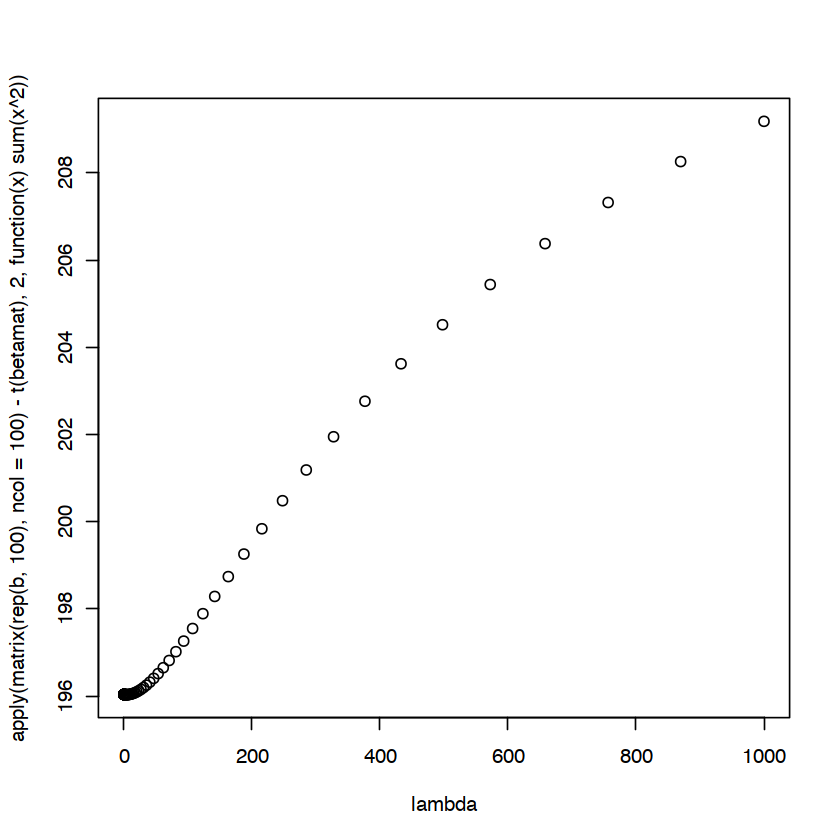

In [12]:
plot( lambda,   apply(matrix(rep(b, 100), ncol=100)  - t(betamat), 2, function(x) sum(x^2) )
) 
which.min(apply(matrix(rep(b, 100), ncol=100)  - t(betamat), 2, function(x) sum(x^2) )
 )

## OLS

In [14]:
system.time( fit <- lm(y~0+X) )

summary(fit)
bhat <-  fit$coefficients
bhat[is.na(bhat)] <-  0

   user  system elapsed 
  0.002   0.000   0.002 


Call:
lm(formula = y ~ 0 + X)

Residuals:
ALL 50 residuals are 0: no residual degrees of freedom!

Coefficients: (350 not defined because of singularities)
      Estimate Std. Error t value Pr(>|t|)
X1     1.77612         NA      NA       NA
X2    12.66361         NA      NA       NA
X3     1.22678         NA      NA       NA
X4     8.53841         NA      NA       NA
X5     0.48924         NA      NA       NA
X6     5.28578         NA      NA       NA
X7     6.53878         NA      NA       NA
X8     1.09946         NA      NA       NA
X9    -5.05933         NA      NA       NA
X10   -6.90089         NA      NA       NA
X11  -10.51496         NA      NA       NA
X12   -1.09399         NA      NA       NA
X13    3.07949         NA      NA       NA
X14   -4.14813         NA      NA       NA
X15  -13.17403         NA      NA       NA
X16    0.73307         NA      NA       NA
X17  -15.06577         NA      NA       NA
X18    3.34115         NA      NA       NA
X19  -10.48399         NA 

In [15]:
## prediction error
sum( (ynew-X%*%bhat)^2 )

[1] 113.5415

# Penalties

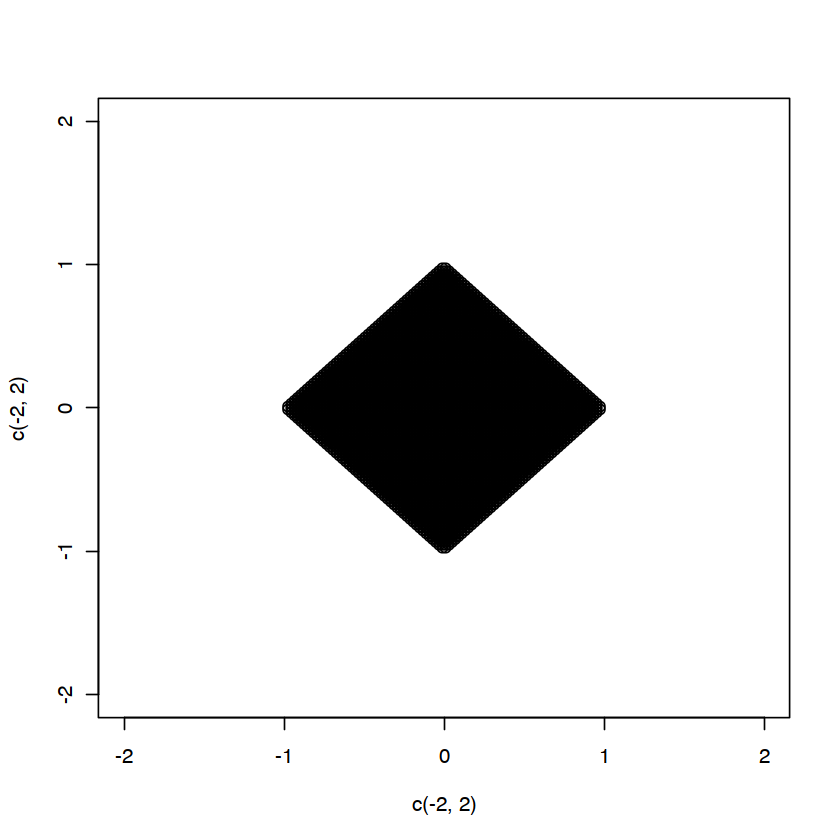

In [17]:
x <- seq(-2, 2, length.out=200)
xy <- cbind(rep(x, each=200), rep(x, 200))


plot(c(-2, 2), c(-2, 2), type="n")
## L1
sel <- ( abs(xy[,1])+ abs(xy[,2]) ) < 1
points(xy[sel, 1], xy[sel, 2])

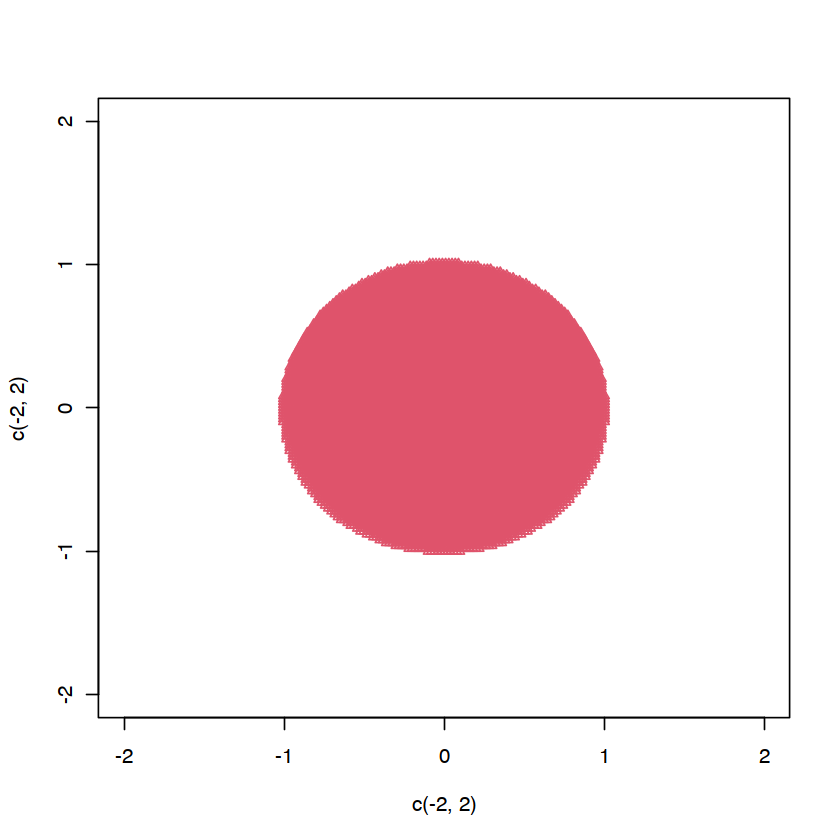

In [18]:
plot(c(-2, 2), c(-2, 2), type="n")

## L2
sel <- ( (xy[,1])^2+ (xy[,2])^2 ) < 1
points(xy[sel, 1], xy[sel, 2], pch=2, col=2)

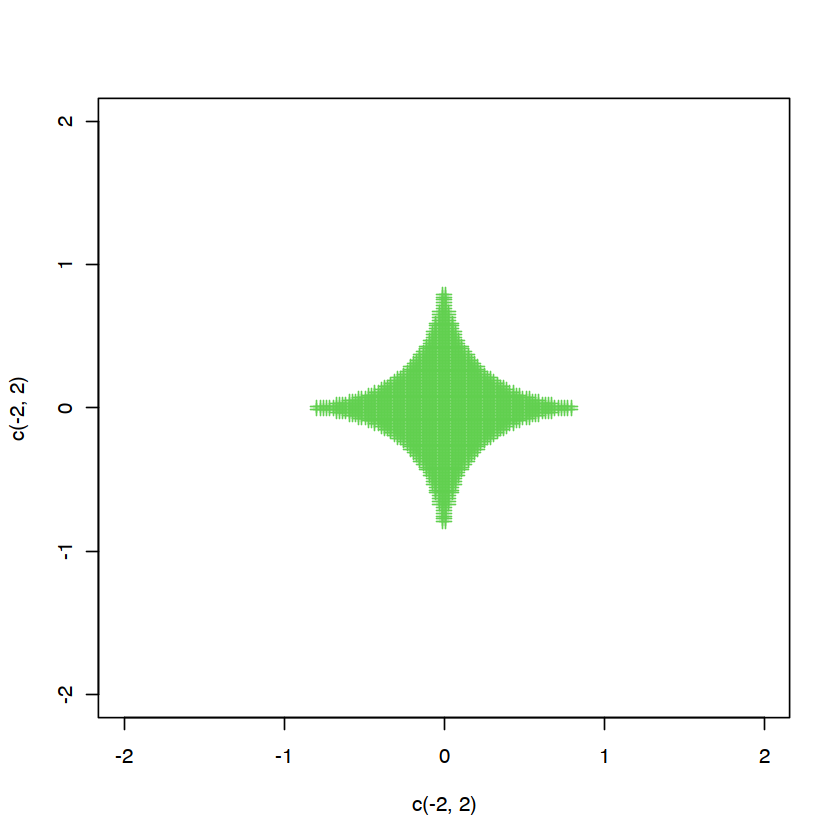

In [19]:
plot(c(-2, 2), c(-2, 2), type="n")
## L0.5
sel <- ( abs(xy[,1])^0.5+ abs(xy[,2])^0.5 ) < 1
points(xy[sel, 1], xy[sel, 2], pch=3, col=3)

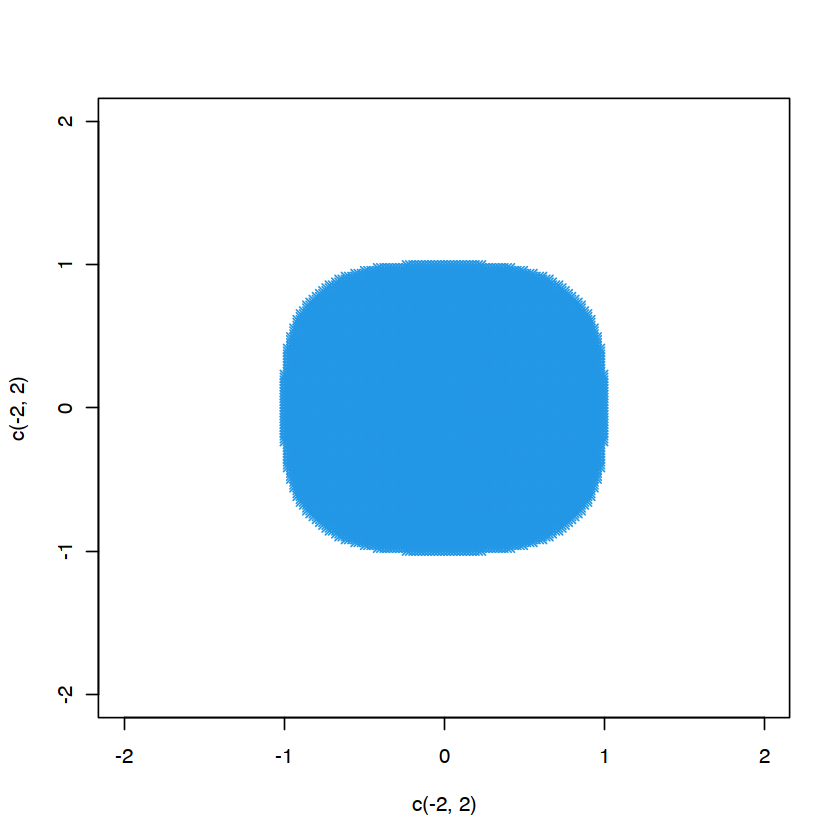

In [20]:
plot(c(-2, 2), c(-2, 2), type="n")
## L3
sel <- ( abs(xy[,1])^3+ abs(xy[,2])^3 ) < 1
points(xy[sel, 1], xy[sel, 2], pch=4, col=4)

# LASSO

In [22]:
n <- 50
p <- 400

X <- matrix(rnorm(n*p), n, p)
##b <- rnorm(p)
b <- rep(0, 400)
b[301:305] <- c(5:1)*2

y <-  X%*%b + rnorm(n)
ynew <-  X%*%b + rnorm(n)




library(glmnet)
fit <- glmnet(X, y, intercept=F, standardize=F, lambda=10**seq(-2, 3, length.out=100))

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


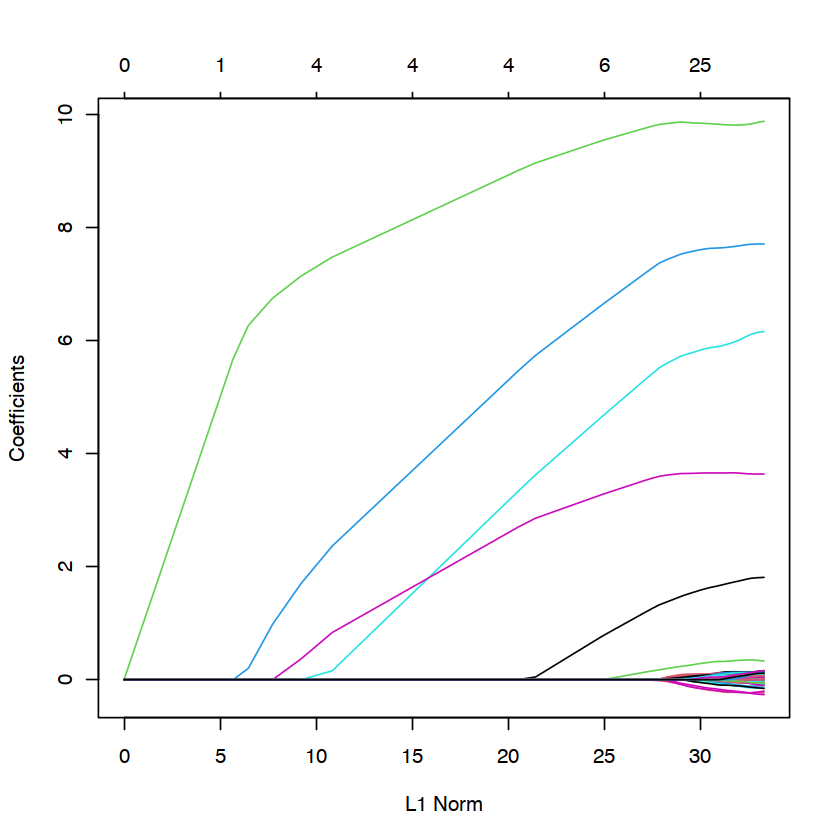

In [23]:
plot(fit)


In [24]:
predict(fit, newx=X)

s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,⋯,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
0,0,0,0,0,0,0,0,0,0,⋯,11.5626308,11.5834200,11.6030998,11.6211962,11.6370801,11.6508178,11.6619327,11.6712915,11.6788839,11.6847033
0,0,0,0,0,0,0,0,0,0,⋯,25.5067787,25.5155853,25.5224492,25.5283062,25.5316691,25.5342225,25.5363608,25.5382281,25.5392071,25.5396490
0,0,0,0,0,0,0,0,0,0,⋯,22.6190580,22.6400181,22.6573464,22.6729497,22.6867520,22.6997507,22.7123126,22.7245978,22.7358451,22.7458849
0,0,0,0,0,0,0,0,0,0,⋯,-17.8387964,-17.8592124,-17.8777351,-17.8935431,-17.9063065,-17.9177567,-17.9280795,-17.9367308,-17.9446082,-17.9522568
0,0,0,0,0,0,0,0,0,0,⋯,-46.8548743,-46.8727146,-46.8885193,-46.9035219,-46.9171468,-46.9298036,-46.9413881,-46.9515986,-46.9605812,-46.9686697
0,0,0,0,0,0,0,0,0,0,⋯,4.6781092,4.6694560,4.6611153,4.6531260,4.6443970,4.6362691,4.6292105,4.6232157,4.6181584,4.6144051
0,0,0,0,0,0,0,0,0,0,⋯,6.7665796,6.7867985,6.8051764,6.8204051,6.8337525,6.8452093,6.8550713,6.8638820,6.8718670,6.8779350
0,0,0,0,0,0,0,0,0,0,⋯,22.2274344,22.2439458,22.2601030,22.2758316,22.2902975,22.3039158,22.3159146,22.3260451,22.3350295,22.3424344
0,0,0,0,0,0,0,0,0,0,⋯,8.2394317,8.2566436,8.2710749,8.2845248,8.2973248,8.3085811,8.3181723,8.3270217,8.3345437,8.3414204
0,0,0,0,0,0,0,0,0,0,⋯,6.2671016,6.2519094,6.2387940,6.2272579,6.2166793,6.2071137,6.1978219,6.1882314,6.1788934,6.1699540


In [25]:
betamat.glmnet <-  as.matrix(coef(fit))
betamat.glmnet <- betamat.glmnet[-1,]

In [27]:
## prediction loss
p.re <- apply(matrix(rep(ynew, ncol(betamat.glmnet)), ncol=ncol(betamat.glmnet)) - X%*%(betamat.glmnet), 2, function(x) sum(x^2) )
              
## oracle predicton loss
po.re <- sum((ynew - X%*%b)**2)

## estimation loss
e.re <- apply(matrix(rep(b, ncol(betamat.glmnet)), ncol=ncol(betamat.glmnet))  - betamat.glmnet, 2, function(x) sum(x^2) )
              

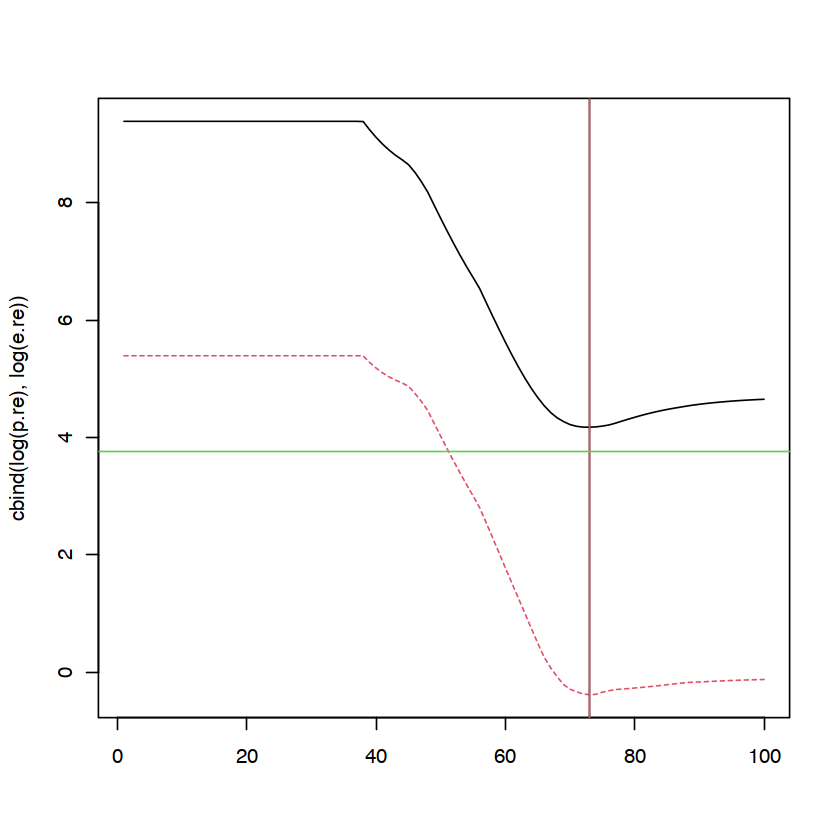

In [28]:
matplot(cbind(log(p.re), log(e.re)), type="l")
abline(v=which.min(p.re))
abline(v=which.min(e.re), col=2)
abline(h=log(po.re), col=3)

# Other regularizations

Checkout the options in *glmnet*, to enable elastic net for example.